In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline


from moviepy.editor import VideoFileClip, ImageClip
from IPython.display import HTML

# Below the functions to apply transformations to the images:

## Turn the images to gray

In [2]:
def turn_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## Apply blurriness

In [3]:
def gauss_blurrer(img, kernel_size):
    return cv2.GaussianBlur(img,(kernel_size, kernel_size),0)

## Apply canny

In [4]:
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

## Create polygon mask

In [5]:
def polygon(img, vertices):
    mask = np.zeros_like(img)   
    ignore_mask_color = 255 
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    return  cv2.bitwise_and(img, mask)

## To detect hough lines 

In [6]:
def hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap):
    return cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
    

## To draw lines

In [7]:
def draw_lines(img, lines):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img,(x1,y1),(x2,y2),(255,0,0),10)

## Define region of interest

In [8]:
def region(img):
    
    '''imshape = img.shape
    bot_left = (45,imshape[0])
    bot_right = (450, 325)
    upper_right = (imshape[1]-450, 325)
    upper_left = (imshape[1]-45,imshape[0])'''
    
    imshape = img.shape
    bot_left = (300,imshape[0]-80)
    bot_right = (imshape[1]-250,imshape[0]-80)
    upper_right = (imshape[1]-560, 445)
    upper_left = (600, 445)
    
    vertices = np.array([[bot_left,bot_right, upper_right, upper_left]], dtype=np.int32)
    return vertices

## Weighted image

In [9]:
def weighted_img(img,initial_img):
    return cv2.addWeighted(initial_img, 0.8, img, 1, 0)

## Masked edges

In [10]:
def edges_remover(img, low_threshold, high_threshold):
    return cv2.bitwise_and(edge, mask)

## Line separator

In [11]:
def separate_lines(lines):
    right = []
    left = []
    for x1,y1,x2,y2 in lines[:, 0]:
        m = (float(y2) - y1) / (x2 - x1)
        if m >= 0: 
            right.append([x1,y1,x2,y2,m])
        else:
            left.append([x1,y1,x2,y2,m])
    
    return right, left

# Pipeline

In [12]:
def pipeline(image):
    vertices = region(image)
    
    gray = turn_gray(image)
    blur = gauss_blurrer(gray, 5)
    edge = canny(blur, 50, 150)
    mask = polygon(edge, vertices)
    
    
    rho = 0.8 # distance resolution in pixels of the Hough grid
    theta = np.pi/180 # angular resolution in radians of the Hough grid
    threshold = 25     # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 50 #minimum number of pixels making up a line
    max_line_gap = 200   # maximum gap in pixels between connectable line segments
    line_img = np.copy(image)*0 # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    
    lines = hough_lines(mask, rho, theta, threshold, min_line_length, max_line_gap)
    
    
    draw_lines(line_img, lines)
    line_img = polygon(line_img, vertices)
    
    final = weighted_img(line_img, image)
    return final
    
    #plt.imshow(final)

#pipeline(mpimg.imread('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/whiteCarLaneSwitch.jpg'))

## video procesor

In [13]:
def process_image(image):
    result = pipeline(image)
    return result

#new_clip_output = 'test_output.mp4'
#test_clip = VideoFileClip("challenge.mp4")


new_clip_output = '/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/output.mp4'
test_clip = VideoFileClip('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/challenge.mp4')


new_clip = test_clip.fl_image(process_image) 
%time new_clip.write_videofile(new_clip_output, audio=False)

HTML("""
<video width="640" height="300" controls>
  <source src="{0}" type="video/mp4">
</video>
""".format(new_clip_output))


[MoviePy] >>>> Building video /Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/output.mp4
[MoviePy] Writing video /Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/output.mp4


100%|██████████| 251/251 [00:14<00:00, 17.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: /Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/output.mp4 

CPU times: user 6.79 s, sys: 2.31 s, total: 9.1 s
Wall time: 16.2 s


## Different transformations output/examples

True

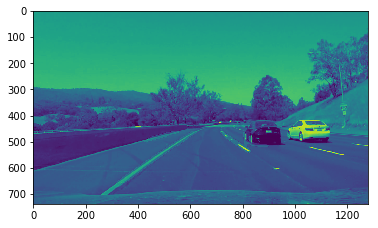

In [14]:
path = '/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/copy.jpg'
img = mpimg.imread(path)

gray = turn_gray(img)
plt.imshow(gray)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/gray_image.jpg',gray)

True

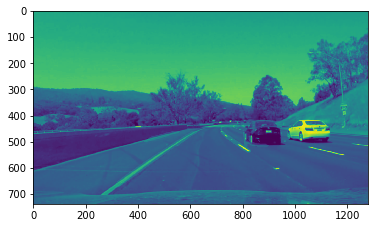

In [15]:
blur = gauss_blurrer(gray, 5)
plt.imshow(blur)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/blur_image.jpg',blur)

True

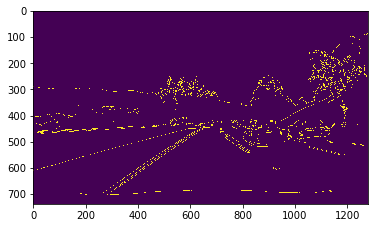

In [16]:
#edge = cv2.Canny(blur, 50, 125)
edge = canny(blur, 50, 150)
#edge_copy = np.uint8(edge)
#edge = cv2.Canny(blur, 50, 125)
plt.imshow(edge)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/canny_image.jpg',edge)

True

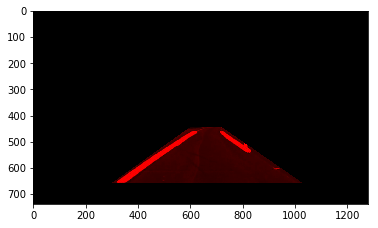

In [17]:
imshape = img.shape
bot_left = (300,imshape[0]-80)
bot_right = (imshape[1]-250,imshape[0]-80)
upper_right = (imshape[1]-560, 445)
upper_left = (600, 445)

'''imshape = img.shape
bot_left = (180,imshape[0]-25)
bot_right = (900, imshape[0]-25)
upper_right = (imshape[1]-470, 415)
upper_left = (450,415)'''
    
vertices = np.array([[bot_left,bot_right, upper_right, upper_left]], dtype=np.int32)

mask = polygon(img, vertices)
plt.imshow(mask)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/mask_image.jpg',mask)

True

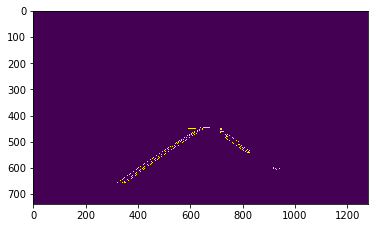

In [18]:

filtered = polygon(edge, vertices)

plt.imshow(filtered)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/filtered_image.jpg',filtered)

True

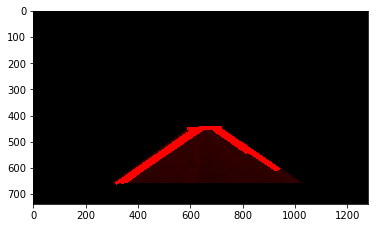

In [19]:
line_img = np.copy(img)*0

lines = hough_lines(filtered, 0.8, np.pi/180, 25,50, 200)

d_lines = draw_lines(line_img, lines)
final = weighted_img(line_img, mask)


plt.imshow(final)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/lines.jpg',final)

True

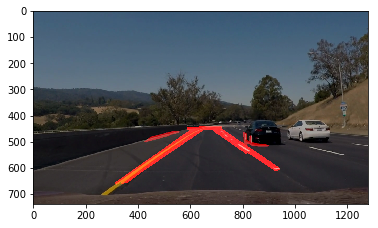

In [20]:
line_img = np.copy(img)*0

lines = hough_lines(filtered, 0.8, np.pi/180, 25,50, 200)

d_lines = draw_lines(line_img, lines)
red = weighted_img(line_img, img)


plt.imshow(red)
cv2.imwrite('/Users/negrita/Desktop/SelfDrivingCars/CarND-LaneLines-P1/test_images/red.jpg',red)